<a href="https://colab.research.google.com/github/Clinda02/text_data_analysis/blob/main/NLP/naver_movie_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

* 데이터 출처 : https://github.com/e9t/nsmc/

  * ratings.txt.txt
  *  ratings_test.txt
  * ratings_train.txt

In [35]:
import pandas as pd

# raw > 링크 주소 복사
df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/refs/heads/master/ratings_train.txt',sep = '\t')
# csv 파일 구분자 : ,(콤마)
# txt 파일 구분자 : \t(탭)

df.head()

id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

# EDA

konlpy

In [36]:
#shape
df.shape

(150000, 3)

In [38]:
#null
df.info()
df.isnull().sum()
df[df['document'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


id document  label
25857   2172111      NaN      1
55737   6369843      NaN      1
110014  1034280      NaN      0
126782  5942978      NaN      0
140721  1034283      NaN      0

In [41]:
#결측치 제거
df.dropna(inplace=True)
df.info()

In [43]:
#label 분포
df['label'].value_counts()

label
0    75170
1    74825
Name: count, dtype: int64

In [61]:
#텍스트 길이
df_len = df.copy()
df_len['len'] = df['document'].str.len()

print(df_len['len'].mean())
df_len.head()

35.204526817560584


id                                           document  label  len
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0   19
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1   33
2  10265843                                  너무재밓었다그래서보는것을추천한다      0   17
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0   29
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1   61

In [45]:
#텍스트 길이
df_len = df.copy()
for i in range(len(df)):
  df_len['len'] = len(df['document'][i])
  i += 1

df_len.head()

# document열의 NaN으로 오류 발생.

KeyError: 25857

<Axes: xlabel='len', ylabel='Count'>

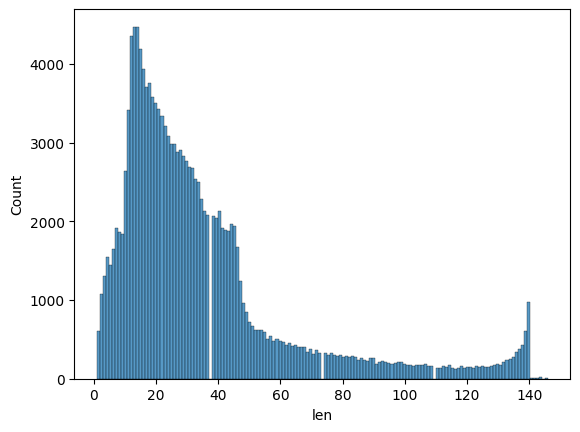

In [62]:
# 텍스트 길이 시각화 > 20 글자 미만이 가장 많음
                    # 적합한 글자수 40 ~ 50개 / 그 이상은 50 글자까지만 나타나게 됨.
import seaborn as sns

sns.histplot(df_len['len'])

일반적으로 사용자는 **20 ~ 30자** 글자 사이의 댓글을 가장 많이 다는 것을 알 수 있었다. 추후 신경망을 사용하여 학습하기 위해, 글자수를 특정값 기준으로 잘라줘야 할 경우, **`60 글자`** 정도 수준에서 분할하여 처리할 예정이다.

In [74]:
# label을 통해 긍정/부정 코멘트 분리
# positive
positive_text = df_len[df_len['label']== 1]['document']
positive_text.head()

# negative
negative_text = df_len[df_len['label']==0]['document']
negative_text.head()

0                              아 더빙.. 진짜 짜증나네요 목소리
2                                너무재밓었다그래서보는것을추천한다
3                    교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
5    막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                            원작의 긴장감을 제대로 살려내지못했다.
Name: document, dtype: object

In [76]:
positive_text.head()

1                     흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
4     사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
8                                액션이 없는데도 재미 있는 몇안되는 영화
9         왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
10                                     걍인피니트가짱이다.진짜짱이다♥
Name: document, dtype: object

In [58]:
# DataFrame 구조의 문자를 문자열 형태로 변환
negative_text = ''.join(negative_text)
positive_text = ''.join(positive_text)

negative_text

#.astype(str)

''

In [80]:
positive_text

'흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다액션이 없는데도 재미 있는 몇안되는 영화왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?걍인피니트가짱이다.진짜짱이다♥볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.ㄱ냥 매번 긴장되고 재밋음ㅠㅠ참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님보면서 웃지 않는 건 불가능하다절대 평범한 영화가 아닌 수작이라는걸 말씀드립니다.kl2g 고추를 털어버려야 할텐데재밋는뎅센스있는 연출력..탁월한 캐스팅..90년대의 향수.. 그래서 9점..엄포스의 위력을 다시 한번 깨닫게 해준 적.남 꽃검사님도 연기 정말 좋았어요! 완전 명품드라마!재밌는데 별점이 왜이리 낮은고아직도 이 드라마는 내인생의 최고!패션에 대한 열정! 안나 윈투어!허허...원작가 정신나간 유령이라... 재미있겠네요!이 영화가 왜 이렇게 저평가 받는지 모르겠다단순하면서 은은한 매력의 영화오게두어라! 서리한이 굶주렸다!정말 맘에 들어요. 그래서 또 보고싶은데 또 보는 방법이 없네? >.. ㅜㅡ윤제문이라는 멋진 배우를 발견하게 됐어요. 소소한 일탈이 잔잔한 미소를 머금게 합니다. 음악은 조금 아쉽네요ㅠㅠ 8점 주고 싶은데 평점 올리고 싶어 10점 줄게요^^데너리스 타르 가르엔...나도 용의주인이 되고 싶다...누이랑,근친상간이나 하고 다닐지라도,소설 속에선 제일 멋진 놈이 자이메 라니스터였는데,드라마속에선,드래곤(용)이 제일 

In [68]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 26.8 MB/s eta 0:00:00


In [79]:
# 각 문자열에서 명사만 추출
from konlpy.tag import Okt
okt = Okt()
negative_nouns = okt.nouns(negative_text)
positive_nouns = okt.nouns(positive_text)

In [85]:
# 추출한 명사에서 각 명사가 몇 번 등장했는지 확인
from collections import Counter # 특정 단어가 몇 번 등장했는지 딕셔너리 타입으로 반환 (예: {"key", 50})
negative_counts = Counter(negative_nouns)
positive_counts = Counter(positive_nouns)

negative_counts

Counter({'더빙': 429,
         '진짜': 4311,
         '목소리': 216,
         '무재': 3,
         '밓었': 1,
         '다그': 74,
         '래서': 15,
         '추천': 292,
         '교도소': 11,
         '이야기': 955,
         '구먼': 8,
         '재미': 2407,
         '평점': 3633,
         '조정': 29,
         '막': 220,
         '걸음': 6,
         '마': 126,
         '세': 172,
         '초등학교': 28,
         '학년': 34,
         '생인': 2,
         '영화': 24330,
         '반개': 207,
         '움': 661,
         '원작': 840,
         '긴장감': 412,
         '제대로': 478,
         '별': 715,
         '욕': 645,
         '이응경': 7,
         '길용우': 4,
         '생활': 56,
         '년': 198,
         '정말': 3239,
         '발': 249,
         '해도': 298,
         '그것': 223,
         '납치': 43,
         '감금': 10,
         '반복': 96,
         '드라마': 2032,
         '가족': 305,
         '연기': 2733,
         '사람': 2404,
         '울면': 7,
         '손': 128,
         '횡단보도': 1,
         '때': 1499,
         '뻔': 228,
         '이범수': 16,
         '취향': 17

In [87]:
# 자주 등장한(예: 50번 이상 등장한) 단어에 대해서만 워드 클라우드 생성
top_50_negative = negative_counts.most_common(50) # 특정 빈도수 이상 나타난 단어들을 반환
top_50_positive = positive_counts.most_common(50)

top_50_negative

[('영화', 24330),
 ('점', 4532),
 ('진짜', 4311),
 ('평점', 3633),
 ('이', 3550),
 ('스토리', 3474),
 ('쓰레기', 3346),
 ('왜', 3335),
 ('정말', 3239),
 ('것', 3128),
 ('뭐', 3108),
 ('감독', 2801),
 ('그냥', 2736),
 ('연기', 2733),
 ('내용', 2640),
 ('시간', 2493),
 ('재미', 2407),
 ('사람', 2404),
 ('좀', 2389),
 ('말', 2367),
 ('거', 2331),
 ('배우', 2238),
 ('최악', 2235),
 ('더', 2057),
 ('이건', 2048),
 ('드라마', 2032),
 ('생각', 1981),
 ('내', 1949),
 ('돈', 1943),
 ('보고', 1888),
 ('별로', 1866),
 ('걸', 1608),
 ('하나', 1557),
 ('때', 1499),
 ('개', 1468),
 ('그', 1466),
 ('주인공', 1438),
 ('정도', 1405),
 ('처음', 1340),
 ('나', 1320),
 ('끝', 1302),
 ('연출', 1266),
 ('볼', 1258),
 ('액션', 1258),
 ('수준', 1197),
 ('임', 1182),
 ('완전', 1143),
 ('작품', 1135),
 ('이해', 1129),
 ('느낌', 1115)]

In [92]:
#워드 클라우드
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(font_path=font_path,
                      width = 800, height= 400,
                      background_color = 'white').generate(dic(top_50_negative))

#결과 시각화
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

NameError: name 'dic' is not defined

In [91]:
dir(WordCloud)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 '_draw_contour',
 '_get_bolean_mask',
 'fit_words',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'process_text',
 'recolor',
 'to_array',
 'to_file',
 'to_image',
 'to_svg']